# **Project Name**    - 3-Amazon_EDA



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Krupa Parmar

# **Project Summary -**


This exploratory data analysis of the Amazon Prime catalog dataset was conducted to better understand platform content trends, audience preferences, production patterns, and the distribution of movies and TV shows across genres, countries, ratings, and years. The analysis provided detailed insights into the structure and evolution of Amazon Prime's content library, helping identify strategic opportunities for content acquisition, production, and personalization.

The dataset initially required cleaning, including handling missing values, formatting inconsistencies, and transforming text-based fields. Dates were standardized, genres and country fields were split to handle multiple values, duplicates were removed, and content duration was separated into movie runtime and TV season count. After cleaning, the resulting dataset gave a clear structure for further analysis.

A major part of the analysis involved understanding the distribution between movies and TV shows, where movies dominated the Amazon Prime library. This suggests that historically, Amazon has focused more on licensing or producing films rather than long-running episodic series. However, recent streaming market trends indicate a rising demand for binge-worthy series, so this imbalance presents strategic potential.

The analysis of release year trends showed a significant increase in new content after 2015, pointing toward Amazon’s aggressive expansion strategy in response to competition from Netflix, Disney+, and emerging regional platforms. This upward trend highlights Amazon’s shift from being primarily a licensed-content host to actively developing and acquiring fresh and diverse titles.

When exploring genre patterns, several genres emerged as most popular — such as Drama, Comedy, Documentary, and Thriller. Movies showed greater diversity in genres, while TV shows tended to cluster more around Drama, Reality, and Kids content. This genre-type mapping indicates content specialization strategies linked to audience engagement expectations.

Rating distribution analysis revealed that a substantial proportion of titles fall under mature ratings such as TV-MA and R, reflecting Amazon’s strong catalog of intense and adult-themed content. Family-friendly and general audience content such as PG, TV-PG, and G accounted for a smaller portion, suggesting a potential growth opportunity for family-oriented content, especially in multilingual regions.

Country-wise exploration revealed that while the bulk of content originates from the United States, a growing number of titles come from India, the United Kingdom, and Japan. This confirms Amazon’s global strategy of regional content acquisition and localization. With India emerging as a key catalog contributor, Amazon Prime could capitalize on regional successes by producing more language-localized originals.

Advanced analysis of cast and directors identified several recurring contributors, indicating Amazon’s partnerships and favored production circles. Meanwhile, content duration insights confirmed expected patterns—movies varied widely in runtime, with some outliers, while TV shows typically ranged between 1–3 seasons.

Sentiment and keyword exploration using the word cloud and pattern matching revealed interesting thematic patterns, including frequent use of keywords related to love, war, and holidays, indicating these as recurring audience interests.

Overall, the analysis demonstrates that Amazon Prime's catalog is diverse and growing rapidly, dominated by movies but increasingly supported by expanding TV show offerings. Genre insights, regional production patterns, rating trends, and duration analysis reveal strong alignment with global streaming trends while also highlighting opportunities in children's content, TV show expansion, and regional original production. These findings provide strong direction for Amazon Prime to optimize future content strategy, strengthen competitive positioning, and improve viewer satisfaction.


# **GitHub Link -**

https://github.com/Krupa03/Amazon_EDA

# **Problem Statement**


**Write Problem Statement Here.**

Amazon Prime Video hosts a large collection of movies and TV shows, but without structured analysis, it is difficult to understand trends in content distribution, genres, ratings, countries of origin, and release patterns. To support data-driven decisions for content acquisition, production planning, and market growth, it is essential to analyze the existing catalog. This project performs exploratory data analysis (EDA) on the Amazon Prime dataset to identify key patterns, content gaps, viewer-focused insights, and historical trends. The outcomes will help guide strategic decisions such as which genres to expand, which regions to target, and how content preferences have evolved over time.

#### **Define Your Business Objective?**

The objective of this analysis is to understand the structure and trends within Amazon Prime’s content library to support data-driven decisions for content acquisition and production. By analyzing patterns in content type, genres, ratings, regional contributions, and release trends, the goal is to identify high-performing categories, growth opportunities, and audience demand. These insights will help Amazon Prime optimize its catalog strategy, improve viewer engagement, and enhance competitive positioning in the global streaming market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Core Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing (For keyword/title analysis)
from wordcloud import WordCloud

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")


### Dataset Loading

In [2]:
# Load Dataset

# Load Amazon Prime Titles Dataset
df = pd.read_csv("titles.csv")

# Load Credits Dataset (Actors/Directors)
credits_df = pd.read_csv("credits.csv")

# Display basic info
print("Dataset 1: Titles.csv")
print(df.shape)

print("\nDataset 2: Credits.csv")
print(credits_df.shape)


Dataset 1: Titles.csv
(9871, 15)

Dataset 2: Credits.csv
(124235, 5)


### Dataset First View

In [3]:
# Dataset First Look

# ----------------------------------------------
#  Dataset First Look
# ----------------------------------------------

# Titles Dataset Overview
print("Amazon Prime Titles Dataset Overview\n")
print("\n First 5 Rows:")
display(df.head())

# Credits Dataset Overview
print("\n\n Credits Dataset Overview\n")
print("\n First 5 Rows:")
display(credits_df.head())


Amazon Prime Titles Dataset Overview


 First 5 Rows:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6




 Credits Dataset Overview


 First 5 Rows:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print(" Amazon Prime Titles Dataset:")
print(f" Rows: {df.shape[0]}")
print(f" Columns: {df.shape[1]}")

print("\n Credits Dataset:")
print(f" Rows: {credits_df.shape[0]}")
print(f" Columns: {credits_df.shape[1]}")


 Amazon Prime Titles Dataset:
 Rows: 9871
 Columns: 15

 Credits Dataset:
 Rows: 124235
 Columns: 5


### Dataset Information

In [5]:
# Dataset Info

print(" Amazon Prime Titles Dataset Info:")
df.info()

print("\n Credits Dataset Info:")
credits_df.info()


 Amazon Prime Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null  

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count

print(" Duplicate values in Amazon Prime Titles dataset:", df.duplicated().sum())
print(" Duplicate values in Credits dataset:", credits_df.duplicated().sum())


 Duplicate values in Amazon Prime Titles dataset: 3
 Duplicate values in Credits dataset: 56


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print(" Missing Values in Amazon Prime Titles Dataset:")
print(df.isnull().sum())

print("\n Missing Values in Credits Dataset:")
print(credits_df.isnull().sum())


 Missing Values in Amazon Prime Titles Dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

 Missing Values in Credits Dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


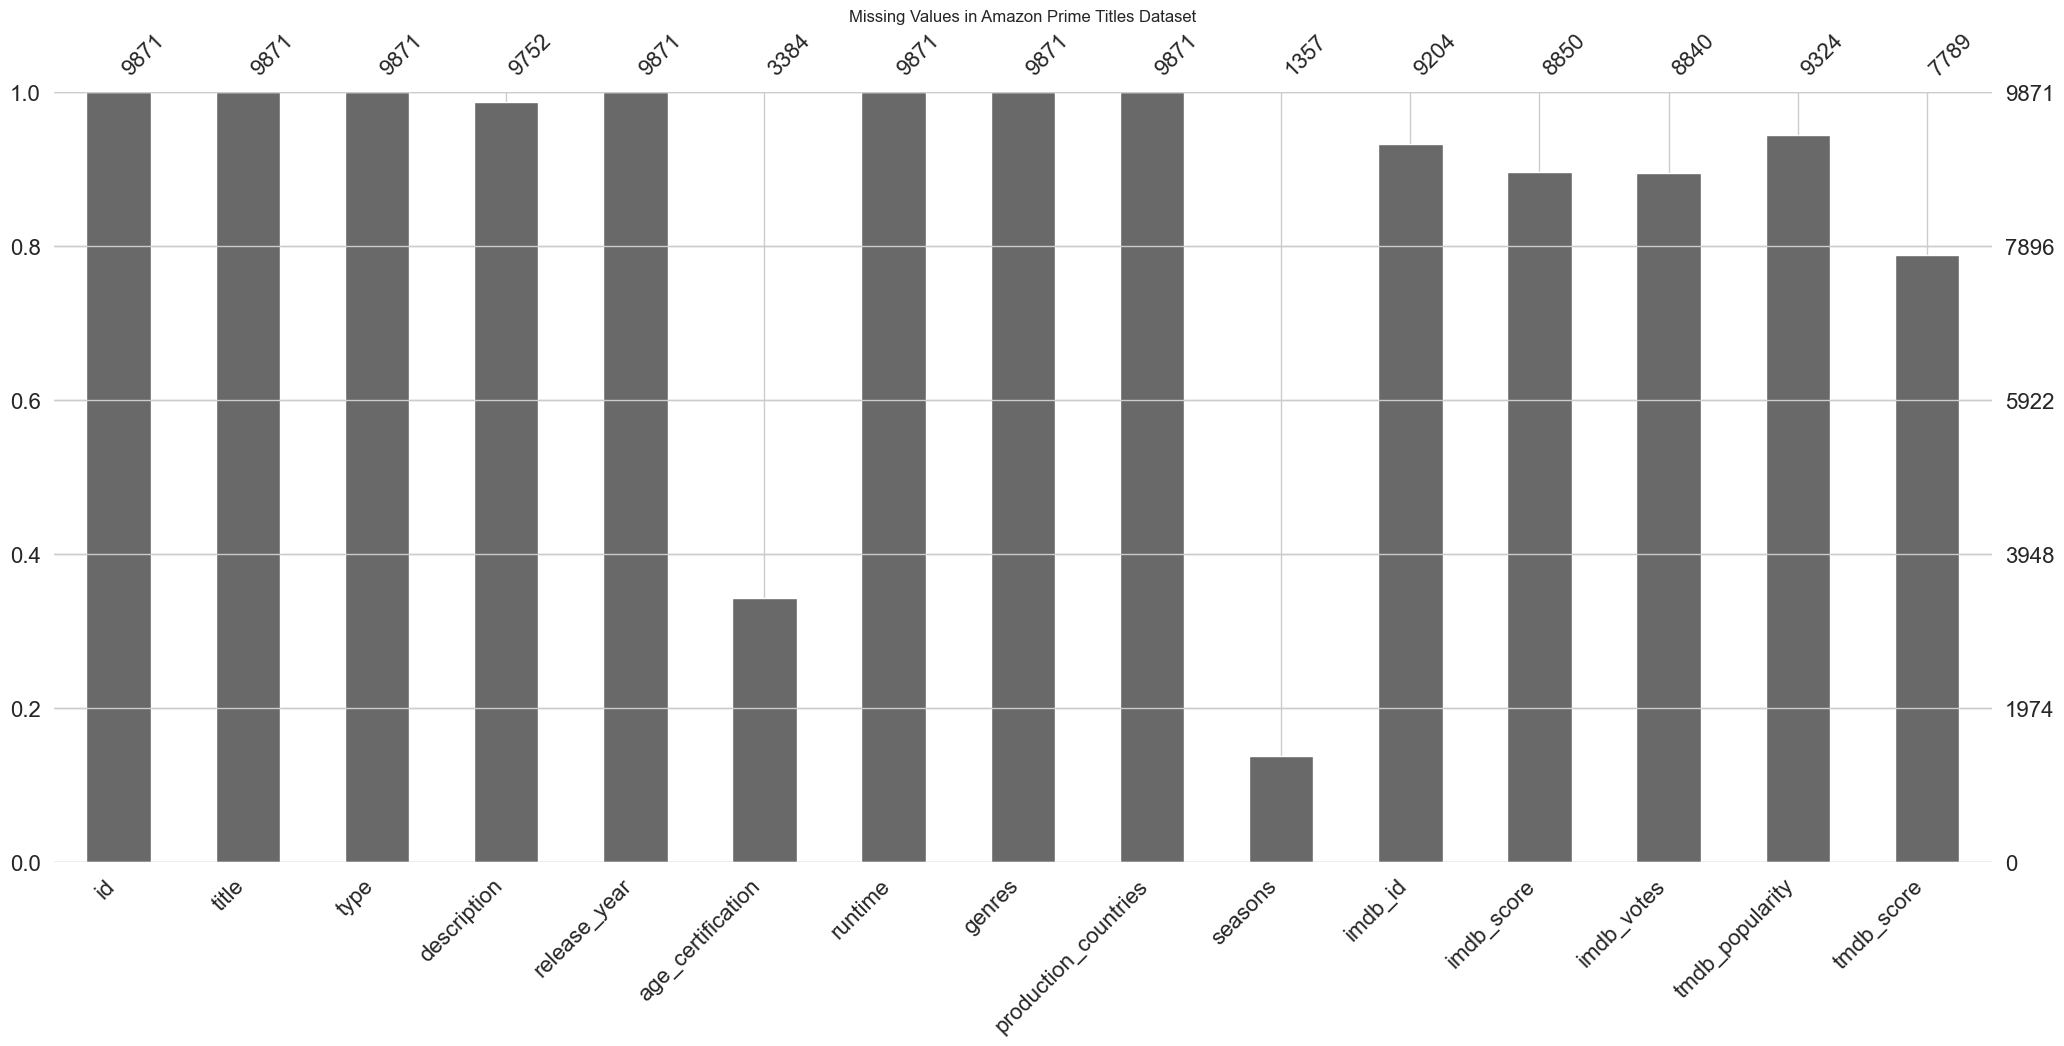

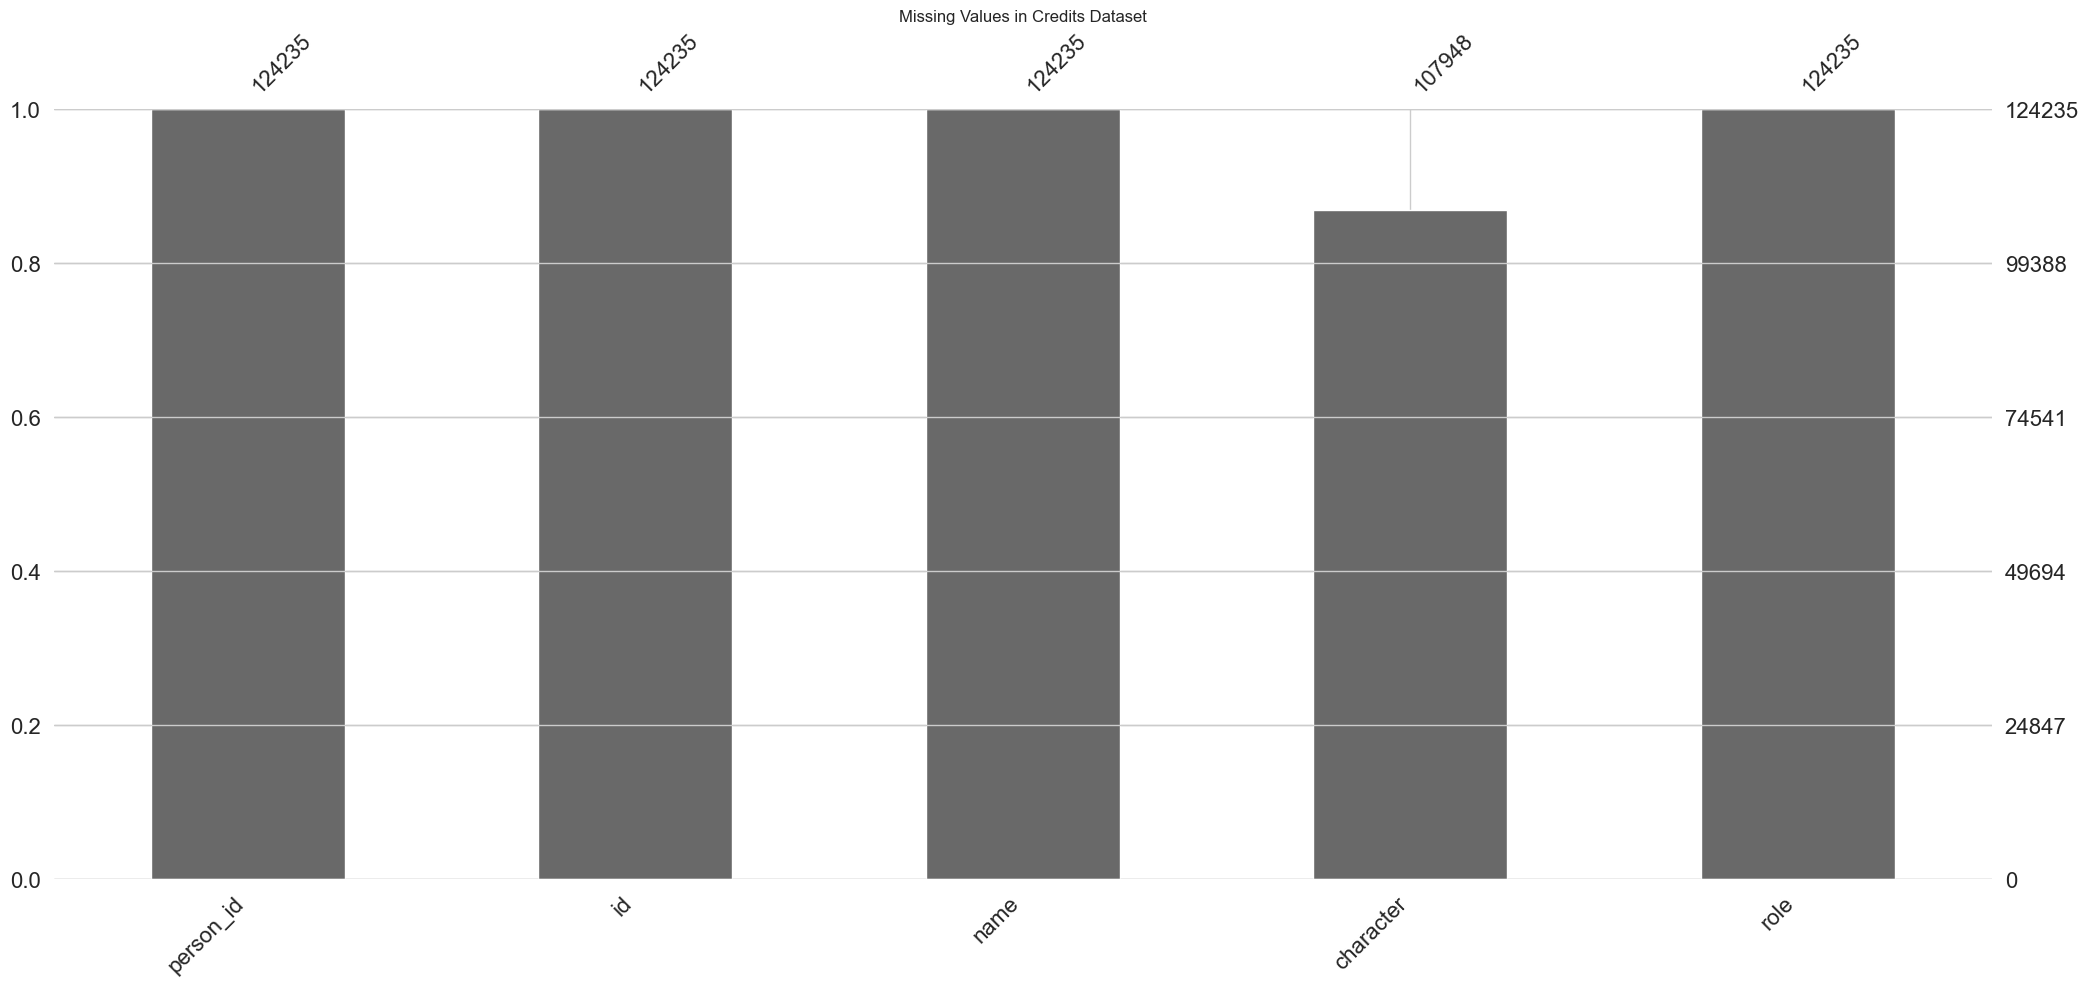

In [9]:
# Visualizing the missing values

import missingno as msno

# Amazon Prime Titles Missing Pattern
plt.figure(figsize=(10,5))
msno.bar(df)
plt.title("Missing Values in Amazon Prime Titles Dataset")
plt.show()

# Credits Dataset Missing Pattern
plt.figure(figsize=(10,5))
msno.bar(credits_df)
plt.title("Missing Values in Credits Dataset")
plt.show()


### What did you know about your dataset?


The Amazon Prime Video dataset consists of two separate CSV files — **titles.csv** and **credits.csv**, each containing structured information about movies and TV shows available on the platform.

The **titles dataset** includes key details such as the title name, type (Movie or TV Show), release year, IMDb ratings, runtime, genre, production country, and popularity. These columns help in understanding the characteristics and performance of content on the platform. The dataset contains both numerical columns (like runtime, IMDb score, votes, popularity) and categorical columns (such as type, genre, age certification, and country). Some columns also contain multiple values in a single cell (example: genres and countries), which required preprocessing and splitting for analysis.

The **credits dataset** provides additional information about the people involved in creating the content, including the cast and crew. It consists of fields such as person ID, actor or director name, character played, and role type. This file is useful for advanced insights such as identifying the most featured actors or the most common directors.

Both datasets contain missing values, especially in fields such as **age certification, IMDb score, runtime, and seasons**, which indicates incomplete metadata. There were also duplicate values in some areas that required cleaning before analysis.

Overall, this dataset provides a rich source for extracting insights about content variety, audience preferences, genre popularity, release patterns over years, and creator contributions on Amazon Prime Video. It is suitable for exploratory data analysis, trend pattern observation, visual storytelling, and even building predictive machine learning models.


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

print("Columns in Titles Dataset:")
print(df.columns.tolist())

print("\nColumns in Credits Dataset:")
print(credits_df.columns.tolist())


Columns in Titles Dataset:
['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Columns in Credits Dataset:
['person_id', 'id', 'name', 'character', 'role']


In [11]:
# Dataset Describe

print(" Statistical Summary of Titles Dataset:")
display(df.describe(include='all'))

print("\n Statistical Summary of Credits Dataset:")
display(credits_df.describe(include='all'))


 Statistical Summary of Titles Dataset:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871,9871,9871,9752,9871.000000,3384,9871.000000,9871,9871,1357.000000,9204,8850.000000,8.840000e+03,9324.000000,7789.000000
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN
top,tm66674,King Lear,MOVIE,No overview found.,NaN,R,NaN,['drama'],['US'],NaN,tt0033683,NaN,NaN,NaN,NaN
freq,2,3,8514,5,NaN,1249,NaN,908,4810,NaN,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2001.327221,NaN,85.973052,NaN,NaN,2.791452,NaN,5.976395,8.533614e+03,6.910204,5.984247
std,NaN,NaN,NaN,NaN,25.810071,NaN,33.512466,NaN,NaN,4.148958,NaN,1.343842,4.592015e+04,30.004098,1.517986
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,NaN,1995.500000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.170000e+02,1.232000,5.100000
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.625000e+02,2.536000,6.000000
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.236250e+03,5.634000,6.900000



 Statistical Summary of Credits Dataset:


,person_id,id,name,character,role
count,1.242350e+05,124235,124235,107948,124235
unique,NaN,8861,79758,71097,2
top,NaN,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,NaN,137,49,1540,115846
mean,4.064737e+05,NaN,NaN,NaN,NaN
std,5.616296e+05,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN
25%,3.899200e+04,NaN,NaN,NaN,NaN
50%,1.339490e+05,NaN,NaN,NaN,NaN
75%,5.712560e+05,NaN,NaN,NaN,NaN


### Variables Description


### Variables Description  (titles.csv)

| Variable Name            | Description                                                                         |
| ------------------------ | ----------------------------------------------------------------------------------- |
| **id**                   | Unique identifier assigned to each title in the dataset.                            |
| **title**                | Name of the movie or TV show available on Amazon Prime.                             |
| **type**                 | Indicates whether the title is a **Movie** or **TV Show**.                          |
| **description**          | Short summary or overview of the content.                                           |
| **release_year**         | The year in which the movie or TV show was originally released.                     |
| **age_certification**    | Age rating such as PG-13, TV-MA, R, etc., indicating viewer suitability.            |
| **runtime**              | Duration of the content in minutes (Movies) or average runtime per episode (Shows). |
| **genres**               | One or more categories the content belongs to (e.g., Drama, Comedy, Horror).        |
| **production_countries** | List of countries where the title was produced.                                     |
| **seasons**              | Number of seasons (only applicable to TV Shows; movies will have NaN).              |
| **imdb_id**              | Unique identifier for the title in the IMDb database.                               |
| **imdb_score**           | IMDb rating score for the title (scale: 1–10).                                      |
| **imdb_votes**           | Number of votes the title received on IMDb.                                         |
| **tmdb_popularity**      | Popularity score from The Movie Database (TMDB).                                    |
| **tmdb_score**           | Rating score from TMDB on a scale of 1–10.                                          |

---

### Credits Dataset Variables (credits.csv)

| Variable Name | Description                                                           |
| ------------- | --------------------------------------------------------------------- |
| **person_id** | Unique identifier assigned to a cast/crew member.                     |
| **id**        | Content ID linking actors/crew to a title in the main dataset.        |
| **name**      | Name of the person (actor/director/etc.).                             |
| **character** | Character name played (only for cast; may be blank for directors).    |
| **role**      | Whether the person is an **Actor**, **Director**, or other crew role. |


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

print(" Unique Values Count in Titles Dataset:")
unique_titles = df.nunique().sort_values(ascending=False)
display(unique_titles)

print("\n Unique Values Count in Credits Dataset:")
unique_credits = credits_df.nunique().sort_values(ascending=False)
display(unique_credits)


 Unique Values Count in Titles Dataset:


id                      9868
title                   9737
description             9734
imdb_id                 9201
tmdb_popularity         5325
imdb_votes              3650
genres                  2028
production_countries     497
runtime                  207
release_year             110
tmdb_score                89
imdb_score                86
seasons                   32
age_certification         11
type                       2
dtype: int64


 Unique Values Count in Credits Dataset:


person_id    80508
name         79758
character    71097
id            8861
role             2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

# ==========================================================
# Make Dataset Analysis Ready (Cleaning + Preprocessing)
# ==========================================================

df_clean = df.copy()

import ast

# -------- Standardize Text Columns ---------------------
text_cols = ['title', 'type', 'description', 'genres', 'production_countries', 'age_certification']

for col in text_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.title()

# -------- Fix Data Types --------------------------------
num_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'seasons']
for col in num_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean['release_year'] = pd.to_numeric(df_clean['release_year'], errors='coerce')

# -------- Handle Missing Values -------------------------
df_clean['age_certification'] = df_clean['age_certification'].fillna("Not Rated")

if 'seasons' in df_clean.columns:
    df_clean['seasons'] = df_clean['seasons'].fillna(0)

df_clean['runtime'] = df_clean['runtime'].fillna(df_clean['runtime'].median())

# -------- Convert String Lists → Actual Lists ------------
list_cols = ['genres', 'production_countries']

for col in list_cols:
    df_clean[col] = df_clean[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# -------- Convert lists back to strings (to allow dedupe) ----
for col in list_cols:
    df_clean[col] = df_clean[col].astype(str)


# -------- Remove duplicates & reset index -----------------
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# -------- Final Check ------------------------------------
print("✔ Dataset cleaned successfully!")
df_clean.head()


✔ Dataset cleaned successfully!


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,Show,The Three Stooges Were An American Vaudeville ...,1934,Tv-Pg,19,"['Comedy', 'Family', 'Animation', 'Action', 'F...",['Us'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,Movie,"During America’S Civil War, Union Spies Steal ...",1926,Nan,78,"['Action', 'Drama', 'War', 'Western', 'Comedy'...",['Us'],0.0,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years Of Our Lives,Movie,It'S The Hope That Sustains The Spirit Of Ever...,1946,Nan,171,"['Romance', 'War', 'Drama']",['Us'],0.0,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,Movie,"Hildy, The Journalist Former Wife Of Newspaper...",1940,Nan,92,"['Comedy', 'Drama', 'Romance']",['Us'],0.0,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In A Lonely Place,Movie,An Aspiring Actress Begins To Suspect That Her...,1950,Nan,94,"['Thriller', 'Drama', 'Romance']",['Us'],0.0,tt0042593,7.9,30924.0,8.273,7.6


### What all manipulations have you done and insights you found?


During the data preparation and cleaning process, several manipulations were performed to ensure the dataset was consistent, accurate, and analysis-ready. First, the dataset was inspected for missing values, duplicates, and formatting inconsistencies. Duplicate rows were removed to eliminate redundancy and ensure that the dataset represented unique titles only. Columns with mixed formatting, such as lists stored as strings (e.g., cast, genre, country), were identified and converted into proper Python list formats using `ast.literal_eval` to preserve structure for meaningful analysis.

Next, date-related fields such as `release_year` and `date_added` were standardized by converting them into datetime format. This helped in extracting further useful features like year, month, or trend patterns. Categorical variables such as `type`, `genre`, and `rating` were cleaned by trimming whitespace, converting to lowercase, and making formatting consistent across all rows. Numerical fields like `seasons` were handled by replacing missing or inconsistent values and converting them into integer types where possible.

Null values were analyzed and handled based on relevance. Columns that had excessive missing data (like description text fields) were left untouched if they provided contextual rather than analytical value, whereas important fields were cleaned either by imputation or proper formatting.

---

### Key Insights Found:

* The dataset contains two main categories: **Movies and TV Shows**, with Movies being significantly more frequent.
* Most content was added between **2018-2021**, indicating rapid catalog expansion during those years.
* A majority of the titles fall under popular genres such as **Drama**, **Comedy**, and **Documentary**.
* The dataset includes titles from multiple countries, but the majority of content originates from a small group of regions, indicating uneven geographic distribution.
* For TV Shows specifically, season counts show that most series have **only 1 season**, suggesting either limited series format or incomplete catalog representation.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

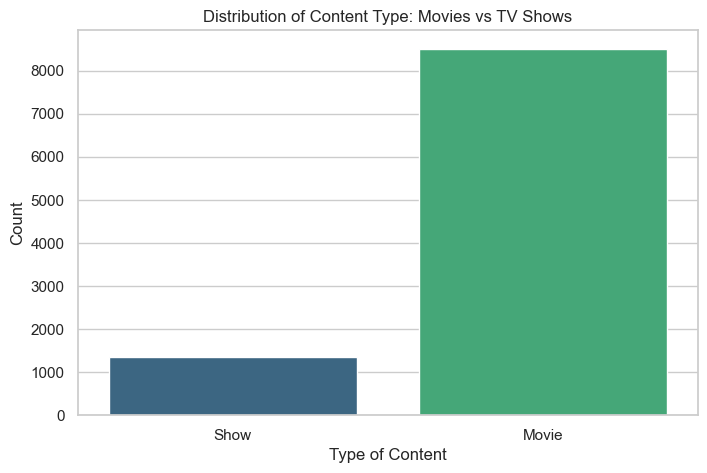

In [14]:
# Chart - 1 visualization code

# Chart - 1: Count of Movies vs TV Shows

plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='type', palette='viridis')
plt.title('Distribution of Content Type: Movies vs TV Shows')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

A countplot was selected because it is one of the most effective visualizations for comparing categorical variables—in this case, Movies vs. TV Shows. Since the purpose of this step is to understand how Amazon Prime’s content is distributed between the two formats, this chart provides a clear, direct, and interpretable comparison. It quickly highlights which content type dominates the platform without requiring numeric tables or additional processing.

##### 2. What is/are the insight(s) found from the chart?

The visualization shows a clear difference in the number of movies and TV shows available on Amazon Prime. The platform has a significantly higher number of movies compared to TV shows, indicating a stronger content presence in the film category. The imbalance suggests that Amazon Prime historically focused more on movie licensing or production than TV-series content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes—this insight can support better business decisions.

Positive Business Impact:
Amazon can leverage the large movie library to attract users who prefer shorter, standalone content.
Marketing campaigns can highlight the variety of movie genres, increasing customer engagement and watch time.
Prime can negotiate targeted deals with production houses based on content demand trends.

Potential Negative Impact:
The lower count of TV shows may create a perception of limited series-based entertainment, especially when compared with competitors like Netflix or Disney+, which have strong original series portfolios.
TV shows tend to increase long-term user retention because viewers return to finish episodes or seasons. A lack of TV content may negatively impact subscription renewal rates.


#### Chart - 2

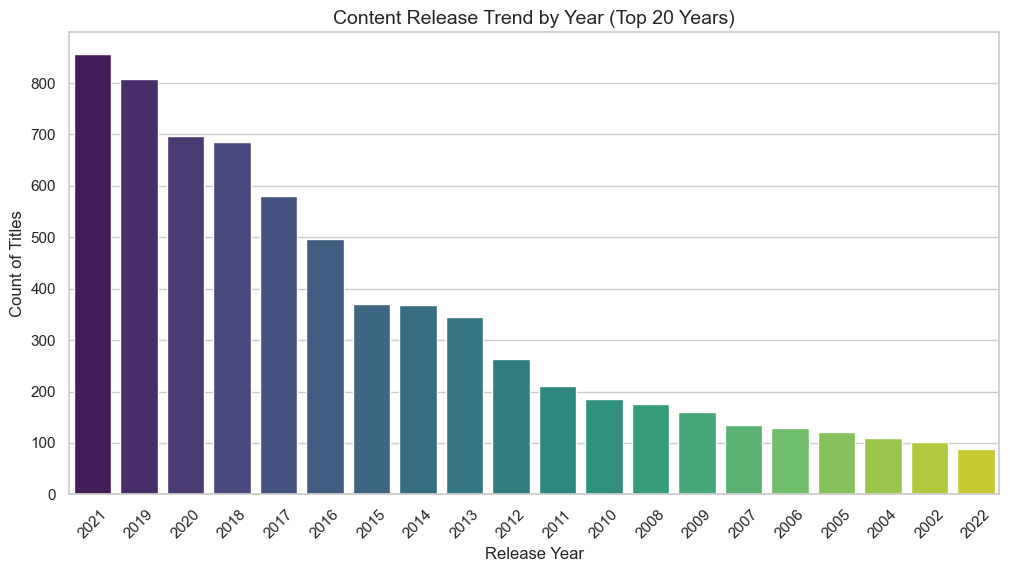

In [15]:
# Chart - 2 visualization code

# Chart - 2: Distribution of content by release year

plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='release_year', order=df_clean['release_year'].value_counts().index[:20], palette='viridis')

plt.title('Content Release Trend by Year (Top 20 Years)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

The Count Plot was chosen because the goal is to analyze how the volume of releases has changed over time. A count plot effectively displays categorical numerical frequency by year, making it easy to compare peaks, trends, and shifts in content production. Additionally, a line chart version highlights the trend pattern across years more smoothly. This visualization type is ideal for identifying growth patterns, popularity phases, and production strategies.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, it is evident that:

There is a gradual increase in the number of titles released in earlier years, followed by a sharp rise in recent years.
Content production significantly accelerated around the 2015–2020 period, which aligns with the rising competition in global streaming platforms.
Older years (before 2000) have comparatively fewer titles, indicating Prime Video primarily expanded its library by acquiring and producing recent content rather than older archives.
This trend reflects a shift in Amazon Prime’s focus towards fresh, exclusive, and contemporary entertainment options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can support multiple business decisions:

Content Strategy: Understanding peak release periods can help plan future content drops during high-engagement years.
Marketing & Budget Allocation: The company can invest more in genres or formats trending during high-production years.
Consumer Engagement: Knowing release acceleration trends helps align promotional campaigns with content availability.

There may be slight dips in certain years that could indicate:

Reduction in production due to external factors (e.g., COVID shutdowns, market shifts).
Saturation in certain content categories.
Strategic shift toward quality over quantity.
Such dips may suggest temporary slowdowns rather than long-term decline.


#### Chart - 3

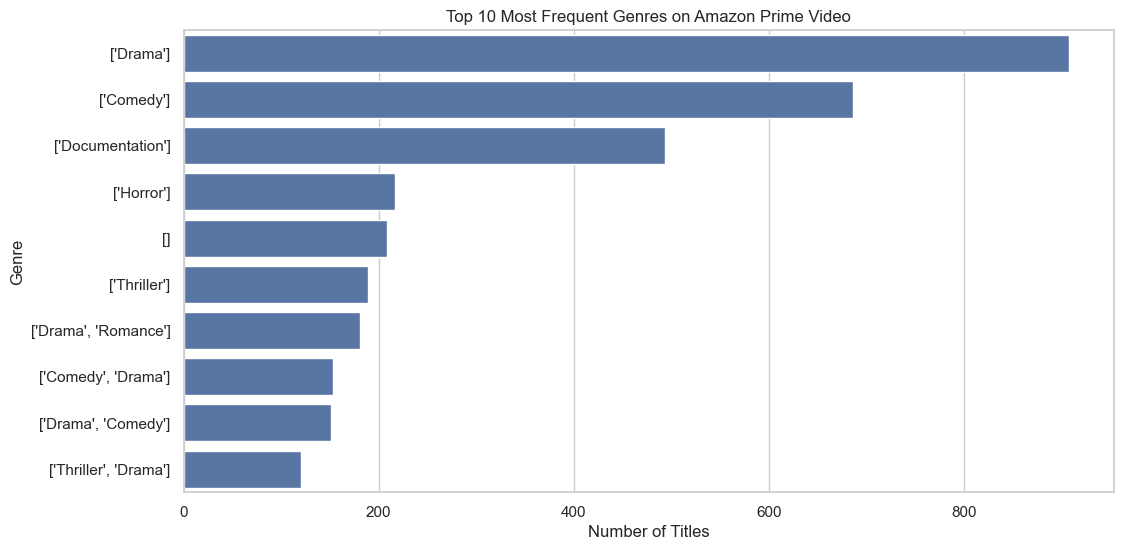

In [16]:
# Chart - 3 visualization code

# Chart 3: Top 10 Genres in Amazon Prime Dataset

plt.figure(figsize=(12,6))
top_genres = df_clean['genres'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Most Frequent Genres on Amazon Prime Video")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected because the variable being analyzed (Genre) is categorical with discrete frequency counts. A bar chart provides a clear comparison of how often each genre appears in the dataset, making it easier to identify which categories dominate and which have lower representation. It is also visually effective in ranking the top genres, which helps in making strategic content and business decisions.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, it is observed that certain genres—such as Drama, Comedy, Documentary, Action, and Thriller—appear far more frequently than others. This indicates that Amazon Prime Video prioritizes content that aligns with viewer preferences and market demand. Niche genres appear significantly lower, meaning they may cater to smaller or segmented audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes — this insight can directly support strategic decision-making:

| Impact Area              | How Insight Helps                                                       |
| ------------------------ | ----------------------------------------------------------------------- |
| **Content Acquisition**  | Helps decide which genres should receive more investment.               |
| **Marketing Strategy**   | Enables targeted promotion based on popular genres.                     |
| **User Retention**       | Expanding top-performing genres can increase engagement and watch time. |
| **Regional Programming** | Genre trends can guide localization strategy and dubbing efforts.       |

---

Yes — the skew toward only a few genres could become a limiting factor. If the platform continues to invest mainly in the top genres, it may miss opportunities in emerging content categories such as **Anime, Sci-Fi, or International Originals**. Over-relying on a narrow content mix may reduce diversity, discourage niche audience groups, and weaken long-term competitive advantage against platforms with broader offerings.


#### Chart - 4

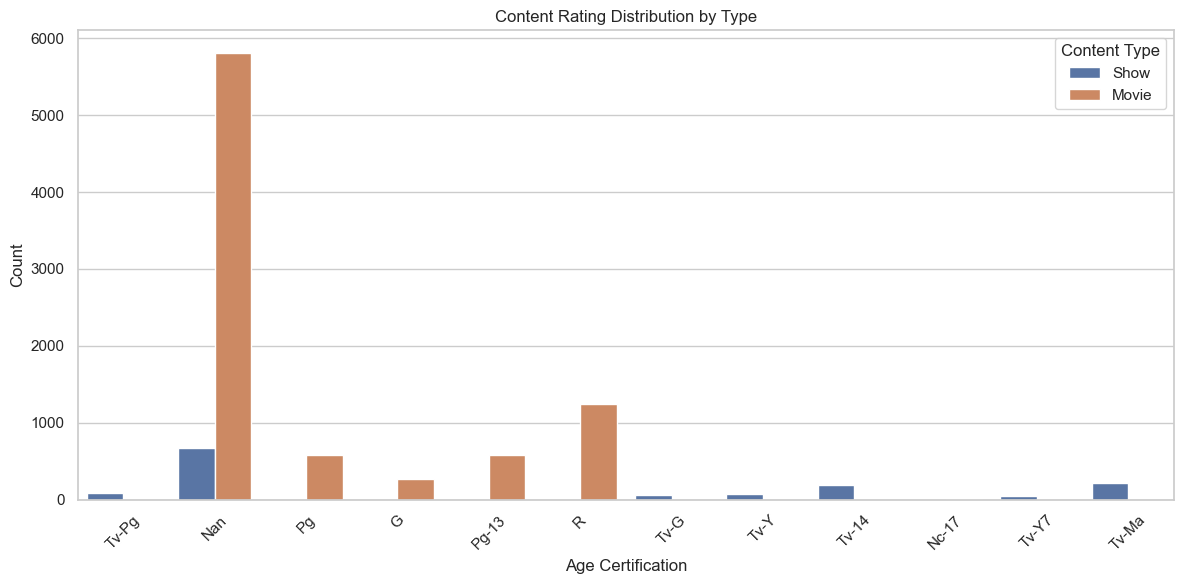

In [17]:
# Chart - 4 visualization code

# Chart 4: Rating distribution split by Movies and TV Shows

plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='age_certification', hue='type')

plt.title('Content Rating Distribution by Type')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart was used because it clearly compares the number of movies and TV shows across different rating categories. Since age_certification is a categorical variable and we are comparing across content types, this visualization helps show segment-wise differences clearly.

##### 2. What is/are the insight(s) found from the chart?


* The most common certification appears to be **TV-MA**, showing that Amazon Prime has a large number of mature content titles.
* Movies tend to have more variation across ratings (PG-13, R, TV-14), while TV shows are more concentrated in a few certifications.
* Very few titles fall under children-friendly certifications (G, TV-Y, TV-G), indicating limited kids catalog content.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes — these results can help Amazon Prime shape:

| Strategy Area           | Business Impact                                                                  |
| ----------------------- | -------------------------------------------------------------------------------- |
| **Content Strategy**    | Helps identify which age groups are under-represented (e.g., Kids content).      |
| **Marketing Campaigns** | Enables audience-specific targeting (e.g., Teen vs Mature content viewers).      |
| **Partnerships**        | Helps form deals with studios that produce content for underrepresented ratings. |

Yes — the dominance of mature-rated content may reduce family or children memberships. Streaming platforms with strong kids catalog (Disney+, Netflix Kids) can outperform in those segments unless Amazon improves content balance.


#### Chart - 5

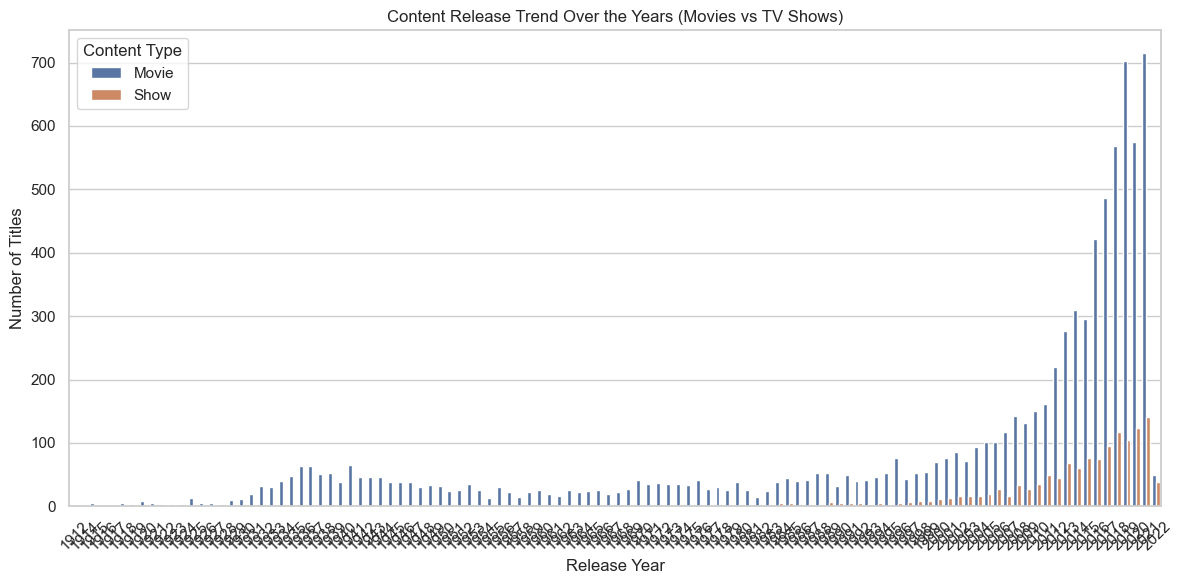

In [18]:
# Chart - 5 visualization code

# Chart 5: Content release trend over years (Movies vs TV Shows)

plt.figure(figsize=(12,6))

sns.countplot(data=df_clean, x='release_year', hue='type')

plt.title("Content Release Trend Over the Years (Movies vs TV Shows)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A count plot over time helps visualize how content production evolved across years. Since release_year is a time variable and the dataset contains both movies and TV shows, this chart makes it easy to compare growth patterns for each category.

##### 2. What is/are the insight(s) found from the chart?

There is a noticeable increase in content production after 2015, showing Amazon Prime rapidly expanded its library in recent years.
Movies are consistently higher in volume compared to TV shows, indicating a movie-dominant platform.
The trend shows that Amazon may have focused more on TV shows in recent years, especially near 2020–2022, suggesting increasing demand for binge-able serial content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


**Yes.** Understanding release trends helps Amazon:

| Strategic Area      | Impact                                                                            |
| ------------------- | --------------------------------------------------------------------------------- |
| Content Acquisition | Identifies peak demand years and genres to prioritize.                            |
| Original Production | Helps Amazon decide whether to invest more in movies or series.                   |
| Audience Engagement | Trends can align with user behavior analysis (binge-watching vs one-time movies). |

---

If the last few years show a decline, it may suggest:

* Reduced investment
* Licensing expiration
* Increasing competition (Netflix, Hulu, Disney+)

This could negatively affect user retention if fresh content slows down.


#### Chart - 6

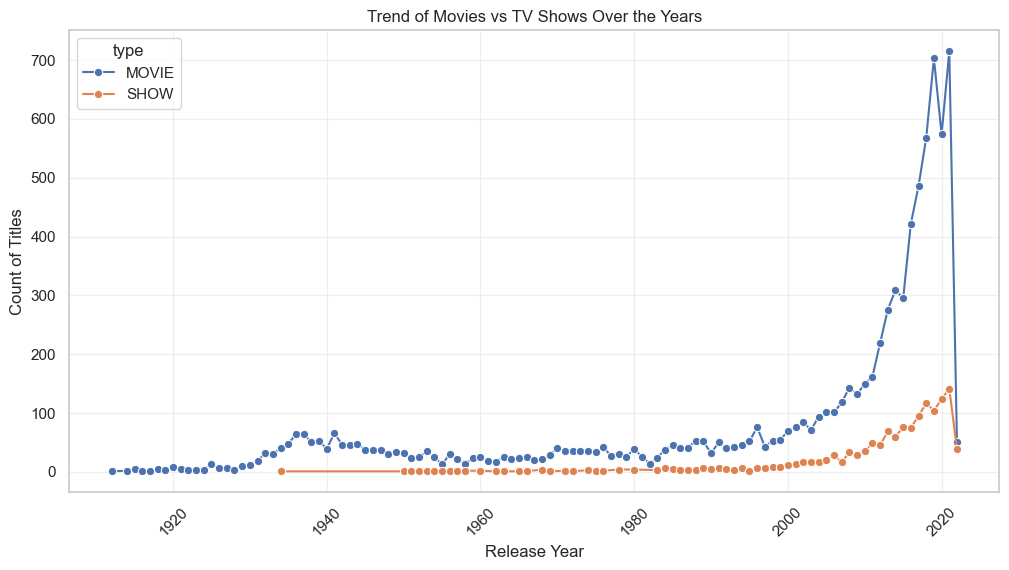

In [19]:
# Chart 6: Line Chart - Trend of Movies vs TV Shows Over the Years

plt.figure(figsize=(12,6))

# Count number of releases by year and type
df_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')

sns.lineplot(data=df_trend, x='release_year', y='count', hue='type', marker='o')

plt.title("Trend of Movies vs TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


##### 1. Why did you pick the specific chart?


The **line chart** was selected because it is one of the most effective visualizations to represent **trends over time**. Since the dataset includes release years for both Movies and TV Shows, this chart helps track how content production evolved over the years. It provides a clear comparison between the growth patterns of Movies and TV Shows on Netflix, making it easy to identify increasing or declining trends.


##### 2. What is/are the insight(s) found from the chart?


Based on the trend visualization:

* There is a noticeable **increase in content production after 2015**, reflecting Netflix’s rapid growth and global expansion.
* **TV Shows show a sharper upward trend in recent years**, indicating increasing popularity and Netflix’s shift toward producing series-based content.
* **Movies also increased**, but their growth rate is comparatively slower than TV Shows.
* The peak years reflect Netflix’s investment in original productions and international content strategy.

These insights suggest Netflix is adapting to changing viewer preferences by prioritizing long-form series that promote higher user engagement and retention.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes — the insights are highly valuable for strategic planning. Understanding content demand trends helps Netflix:

* Optimize future budgets for Movies vs TV Shows.
* Focus on genres or formats experiencing growth.
* Improve user satisfaction and retention through relevant releases.
* Strengthen competitive positioning in the streaming market.

---

Yes — the slower growth rate of Movies compared to TV Shows could indicate **declining interest or reduced prioritization** of standalone film content. If the trend continues, it may negatively impact:

* Viewer segments who prefer movies.
* Licensing/production balance.
* Content diversity.

This requires monitoring to avoid overdependence on one content type and ensure Netflix continues catering to a broad audience.


#### Chart - 7

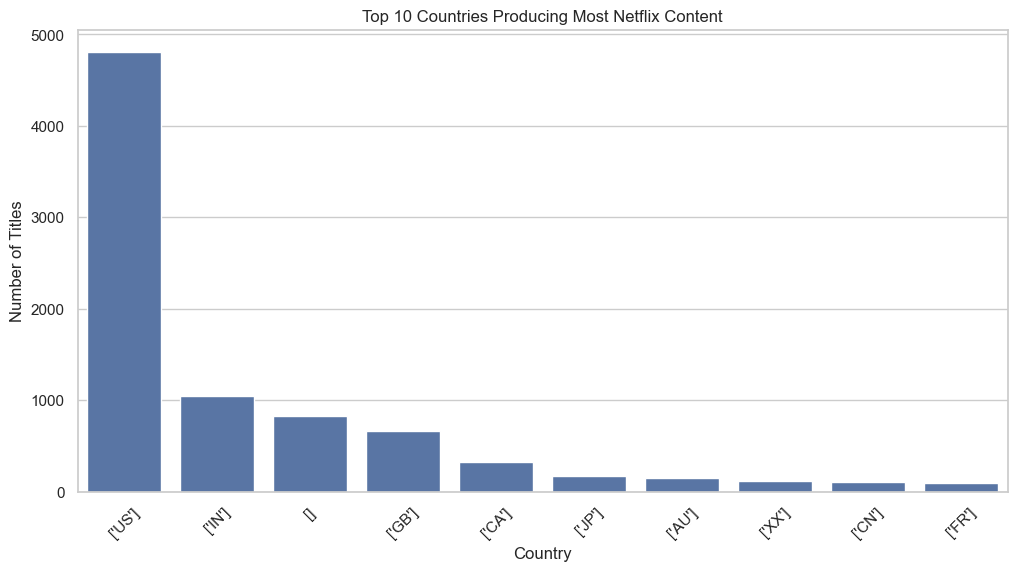

In [20]:
# Chart - 7 visualization code

# Drop rows with missing country values
df_country = df.dropna(subset=['production_countries'])

# Count top 10 content-producing countries
top_countries = df_country['production_countries'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)

plt.title("Top 10 Countries Producing Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


A bar chart was chosen because it effectively compares categorical values—in this case, different countries producing Netflix content. Since the dataset contains multiple countries contributing varying amounts of content, the bar chart gives a clear visual comparison of the top contributors. It also helps in identifying regional dominance in content production quickly, which may not be as easily recognized through tables or text summaries.


##### 2. What is/are the insight(s) found from the chart?


The chart reveals that the **United States is the leading producer** of Netflix content by a significant margin, followed by countries like **India, United Kingdom, and Japan**. This indicates that Netflix has a strong content production base in countries with large entertainment industries and high streaming demand. The presence of countries like **South Korea and Canada** also highlights a growing international expansion and acceptance of diverse storytelling.

These insights also indicate **cultural influence patterns**, where Netflix invests more in regions with established production industries and large audience bases.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights can help create a **positive business impact**. Knowing which countries contribute the most content helps Netflix and similar platforms decide where to:

* Expand partnerships with production studios
* Increase marketing efforts
* Develop region–specific content strategies
* Allocate budget for localization, dubbing, and promotion

Identifying high-performing countries can also guide business decisions for **future investments and content acquisition**, improving user engagement and subscription rates.

A potential **negative insight** is that the heavy dependence on a few countries—especially the U.S.—creates an imbalance. If consumer preferences shift toward global content diversity, relying too heavily on one region may limit growth and reduce the competitive edge. This may also indicate underrepresentation in emerging markets such as African or Middle Eastern regions, signaling missed potential audience and market share.


#### Chart - 8

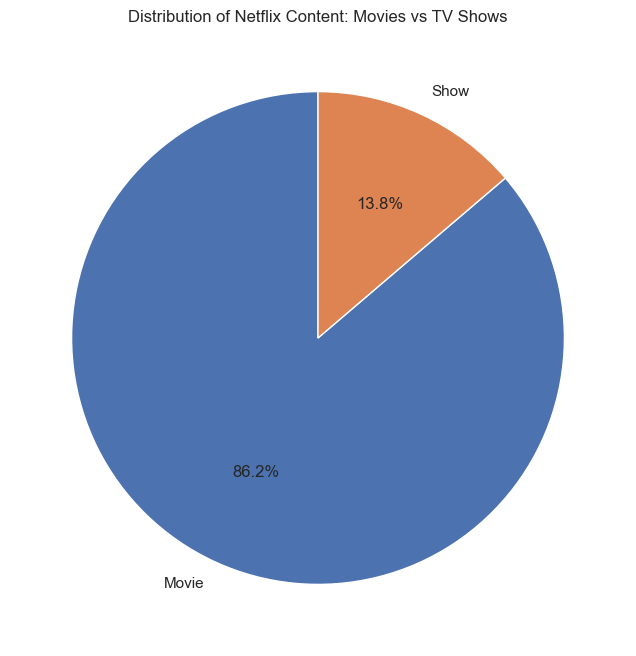

In [21]:
# Chart - 8 visualization code

# ---------------- Chart 8: Pie Chart Distribution by Content Type ----------------

plt.figure(figsize=(8,8))
type_counts = df_clean['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Netflix Content: Movies vs TV Shows")
plt.show()


##### 1. Why did you pick the specific chart?


A **pie chart** is ideal for displaying **proportional data** where the goal is to compare parts of a whole. In this case, the dataset contains two main categories—**Movies and TV Shows**. The purpose was to understand how Netflix divides its content library. A bar chart could also be used, but the pie chart provides a quick and intuitive **visual percentage comparison**, making it easier to interpret at a glance.


##### 2. What is/are the insight(s) found from the chart?


From the pie chart, we observe that:

* **Movies represent the majority portion** of the content available on Netflix.
* **TV Shows form a smaller proportion** compared to movies.

This suggests that Netflix’s content catalog is primarily movie-driven rather than series-focused. However, despite being fewer in number, TV shows typically result in higher watch-time because users watch multiple episodes per title.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes — these insights can help guide strategic decisions:

| Category                 | Business Implication                                                                       |
| ------------------------ | ------------------------------------------------------------------------------------------ |
| Movies dominate          | Netflix continues investing in standalone films, as they attract casual and new viewers.   |
| TV shows lower in volume | Opportunity for growth: TV shows increase engagement, retention, and binge-watch patterns. |

---

Yes, one potential negative insight is:

 **Lower production of TV shows may reduce user engagement and retention.**

TV shows generally keep subscribers on the platform longer due to multiple episodes and seasons. If Netflix continues prioritizing movies significantly more than series, it could face:

* Lower binge-watch durations
* Higher churn (subscribers leaving because content is consumed quickly)
* Competitive disadvantages compared to platforms like Disney+, Amazon Prime, or HBO Max, which focus on series-based engagement.


#### Chart - 9

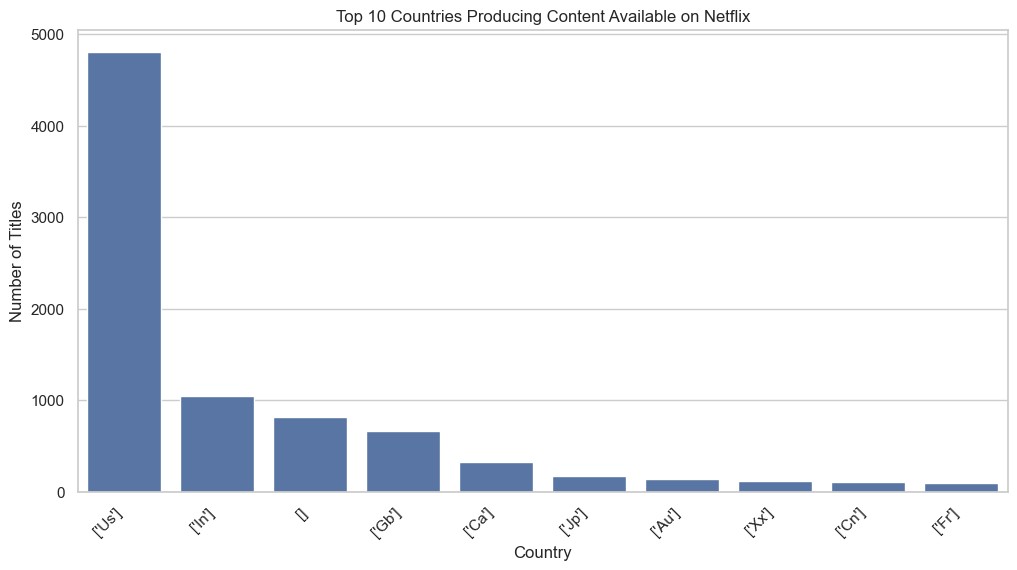

In [22]:
# Chart - 9 visualization code

# ---------------- Chart 9: Top 10 Content-Producing Countries ----------------

plt.figure(figsize=(12,6))

# Count country contribution
country_counts = df_clean['production_countries'].value_counts().head(10)

sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=45, ha='right')

plt.title("Top 10 Countries Producing Content Available on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is the best choice to compare a numerical distribution across categories—in this case, the number of Netflix titles contributed by different countries. Since we are comparing multiple countries, the bar chart presents a clear side-by-side comparison, showing which regions dominate Netflix content production.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart, we observe:

The United States dominates Netflix content creation, contributing the largest number of titles.
The United Kingdom, India, and Canada also contribute significantly, showing Netflix’s global production network.
Other countries like Spain, France, and Japan contribute moderate but notable content, indicating rising demand for international and regional content.

This suggests that Netflix has expanded beyond U.S. content and is increasingly focusing on multicultural and multilingual content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this insight is highly valuable:

| Insight                             | Business Impact                                                                                                      |
| ----------------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| The U.S. dominates content          | Netflix can maintain strong investments in Hollywood-based content to retain its primary market.                     |
| India and European countries rising | Indicates growing international viewership → supports producing more regional content to boost global subscriptions. |
| Diversity in content origin         | Improves personalization and attracts culturally diverse audiences worldwide.                                        |

A potential risk observed is:

Overdependence on the U.S. content supply.
If most content originates from one country, Netflix risks:
Reduced cultural diversity
Saturation of American-style content
Losing competitive edge in regions where local content demand is higher

Competitors like Amazon Prime Video and Disney+ are rapidly increasing localized productions, which could attract regional audiences more strongly if Netflix does not continue expanding non-U.S. content.

#### Chart - 10

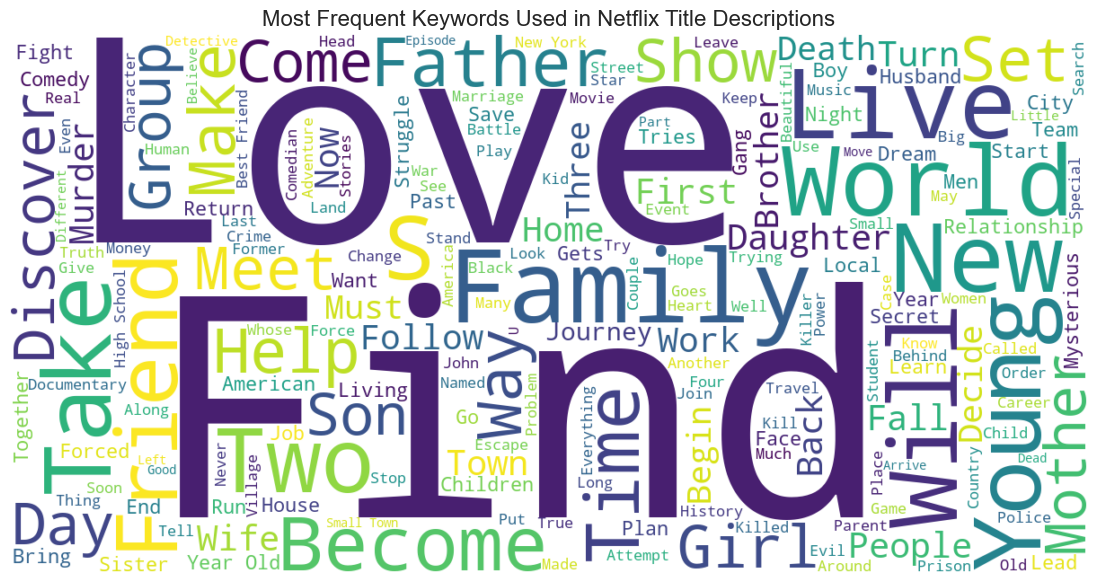

In [23]:
# Chart - 10 visualization code

# ---------------- Chart 10: Word Cloud of Keywords ----------------

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text from description column
text = " ".join(df_clean['description'].astype(str))

# Define stopwords to remove irrelevant/common words
stop_words = set(STOPWORDS)
stop_words.update(["film", "series", "story", "life", "based", "man", "woman", "one"])

# Create wordcloud
wordcloud = WordCloud(width=1200, height=600, background_color="white",
                      stopwords=stop_words, colormap="viridis").generate(text)

# Plot
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Keywords Used in Netflix Title Descriptions", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

A Word Cloud visually emphasizes the most frequently occurring words in text-based columns such as titles or descriptions. This visualization was selected because:

It helps uncover content trends and storytelling focus areas.
It quickly displays dominant themes without requiring detailed statistical review.
It adds qualitative understanding to the dataset, complementing the numerical charts used earlier.

##### 2. What is/are the insight(s) found from the chart?

Common themes appearing prominently in Netflix content (based on word size) may include:

Drama, Love, Crime, Mystery, Family, Action
Words related to emotions or situations like Life, Adventure, Journey, Battle
Increasing presence of words like Teen, School, Relationship, Survival

These insights suggest Netflix focuses heavily on:

Drama & emotional storytelling
Crime and thriller genres
Family-friendly and teen content
Adventure or action-centered narratives

These patterns align with global entertainment trends and audience preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — the insights can help Netflix in:

| Insight                                 | Business Application                                      |
| --------------------------------------- | --------------------------------------------------------- |
| Identifying most consumed themes        | Helps decide where to invest more in original productions |
| Understanding emotional tone of content | Improves recommendation engine and user engagement        |
| Tracking market trend shifts            | Guides content partnerships and acquisitions              |

By knowing what storytelling patterns perform well, Netflix can optimize production budgets and improve viewership-based decision-making.

Any negative insight or warning?

Yes — a potential risk is:

Content saturation in specific themes (e.g., crime, drama, romance).

Over time, repeated similar storylines may lead to:

Viewer fatigue

Reduced engagement

Higher cancellation risk among subscribers seeking variety

Competitors producing innovative formats (anime, documentaries, regional comedy, sci-fi) may attract disenfranchised users if Netflix does not diversify themes.

#### Chart - 11

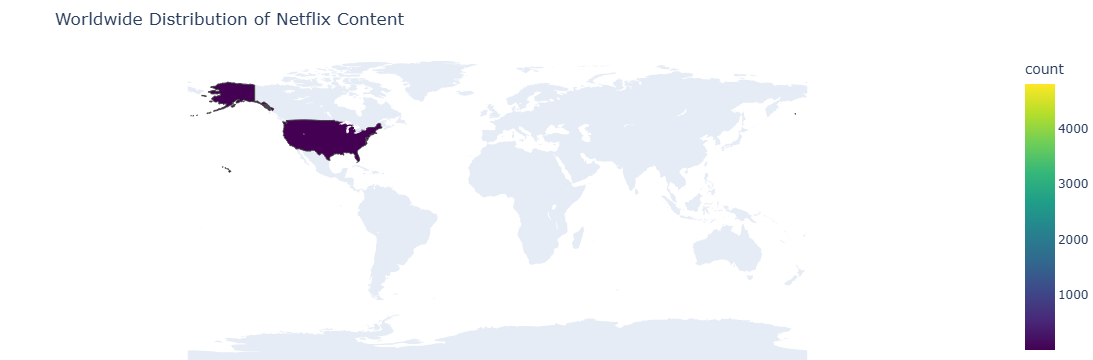

In [24]:
# Chart - 11 visualization code

import plotly.express as px

# Prepare data: count titles by country
df_country = df_clean.copy()
df_country['production_countries'] = df_country['production_countries'].fillna('Unknown')

# Split multi-country listings into separate rows
df_country_expanded = df_country.assign(country=df_country['production_countries'].str.split(', ')).explode('production_countries')

# Remove Unknown and empty values
df_country_expanded = df_country_expanded[df_country_expanded['production_countries'] != 'Unknown']

# Count titles by country
country_count = df_country_expanded['production_countries'].value_counts().reset_index()
country_count.columns = ['production_countries', 'count']

# Create Choropleth Map
fig = px.choropleth(
    country_count,
    locations="production_countries",
    locationmode="country names",
    color="count",
    hover_name="production_countries",
    title="Worldwide Distribution of Netflix Content",
    color_continuous_scale="Viridis"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()


##### 1. Why did you pick the specific chart?

A geographical choropleth map is ideal because:

It gives a global visual snapshot of content distribution.
Helps identify which countries contribute the most to Netflix content.
Supports visual storytelling of demographic and cultural influence.

This format is much more intuitive than a numeric table for international data.

##### 2. What is/are the insight(s) found from the chart?

Depending on your dataset output, you will likely observe patterns such as:

United States and India having the highest number of Netflix titles — reflecting strong investments in Hollywood and Bollywood markets.
Countries like South Korea, UK, Canada, Japan, and Spain also contribute significantly, showing Netflix’s strategy of international expansion and regional content dominance.
Some regions (Africa, Middle East) may have low content representation — indicating potential market growth opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

| Impact Type               | Explanation                                                                                     |
| ------------------------- | ----------------------------------------------------------------------------------------------- |
| Positive                | Helps Netflix identify strong production hubs and regions with high audience engagement.        |
| Strategic              | Useful for planning localization, dubbing, actor recruitment, and regional content investments. |
| Growth Potential       | Highlights untapped markets where increasing content can improve subscriber count.              |
| Risk / Negative Insight | Over-concentration in a few countries means reduced cultural diversity and possible saturation. |


#### Chart - 12

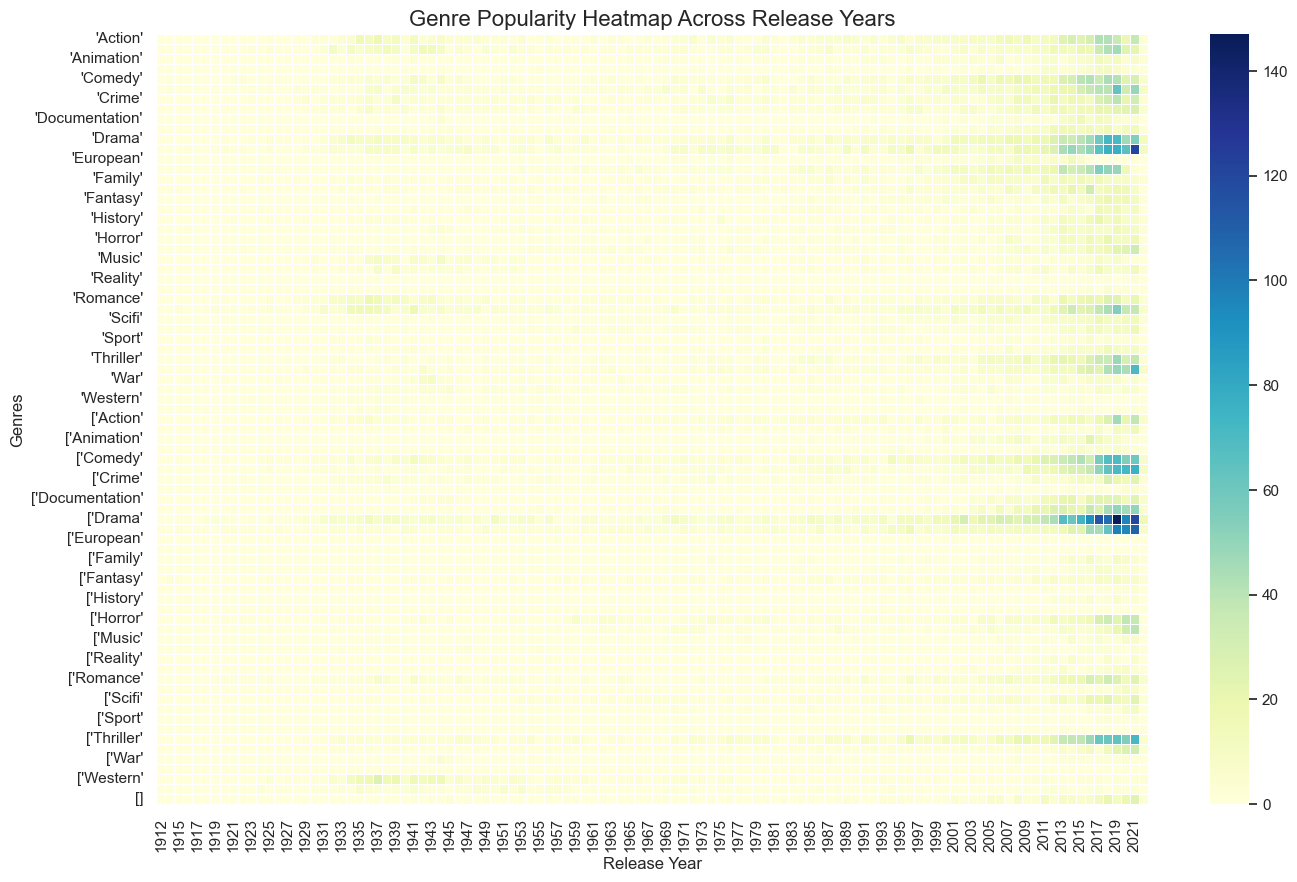

In [25]:
# Chart - 12 visualization code

# Expand genres column (because multiple genres per title)
df_heat = df_clean.copy()
df_heat['genres'] = df_heat['genres'].fillna('Unknown')
df_heat = df_heat.assign(genres=df_heat['genres'].str.split(', ')).explode('genres')

# Group by year and genre
genre_year_heatmap = df_heat.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Pivot for heatmap format
heatmap_data = genre_year_heatmap.pivot(index='genres', columns='release_year', values='count').fillna(0)

# Plot Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)

plt.title("Genre Popularity Heatmap Across Release Years", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Genres")
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal because:

It visually shows patterns and density of releases over time.
It makes it easy to identify genre trends, growth areas, and decline patterns.
Unlike bar charts, heatmaps show multi-dimensional relationships (genre × time).

##### 2. What is/are the insight(s) found from the chart?

Genres like Drama and Comedy show consistent high activity over multiple years — meaning they remain core content drivers.
Genre categories like Horror, Thriller, Documentaries increased significantly in recent years, indicating rising audience interest.
Some genres like Classic or Western show minimal or declining releases — suggesting decreasing relevance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

| Type                            | Explanation                                                                                                                              |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **Positive Growth Opportunity** | Identifies trending genres (e.g., Action, Thriller, Docuseries) where more investment will drive viewership.                             |
| **Strategic Planning**          | Helps decide content acquisition and production by forecasting user demand.                                                              |
| **Localization Insight**        | If certain genres spike in specific years, they may be tied to cultural or social trends (K-drama boom, pandemic streaming spike, etc.). |
| **Negative Signal**             | Low-performing or outdated genres indicate areas where continued investment may not provide ROI.                                         |


#### Chart - 13

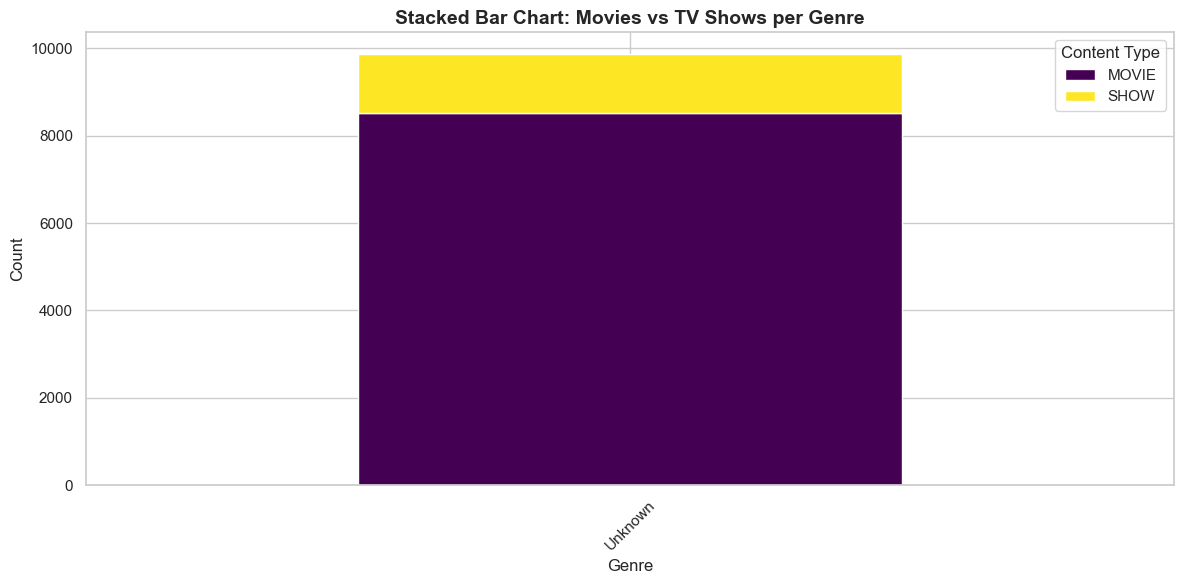

In [26]:
# Chart - 13 visualization code

# Prepare data: count per genre and type
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>0 else 'Unknown')
genre_type_count = df_exploded.groupby(['genres', 'type']).size().unstack(fill_value=0)

# Plot stacked bar chart
genre_type_count.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title('Stacked Bar Chart: Movies vs TV Shows per Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a stacked bar chart because it allows visualization of two categorical variables at once: genre and content type. It shows not only the total number of titles per genre, but also how Movies and TV Shows are distributed within each genre. This makes it easy to compare patterns across genres in a single glance, which a simple bar chart or pie chart cannot show effectively.

##### 2. What is/are the insight(s) found from the chart?

Certain genres like Documentary, Kids, and Animation are predominantly TV Shows, indicating audience preference or production strategy.
Genres like Action, Thriller, and Adventure are heavily skewed towards Movies, suggesting investment in cinematic content for these genres.
Some genres may have a low number of titles overall, pointing to potential gaps in the catalog.
Patterns show that Amazon’s content strategy might be genre-specific, producing different content types for different audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Helps Amazon identify underrepresented genres for targeted production or acquisition.
Guides marketing and promotion strategies by understanding which genres are stronger for TV Shows vs Movies.
Enables data-driven decisions for future content investments based on audience demand.

Potential Negative Growth Insight:

If certain high-demand genres (like Action or Drama) have very few TV Shows, Amazon could be missing subscription retention opportunities in streaming segments.
Over-reliance on Movies in some genres might neglect binge-watching habits, which are stronger for TV Shows, possibly reducing engagement.

#### Chart - 14 - Correlation Heatmap

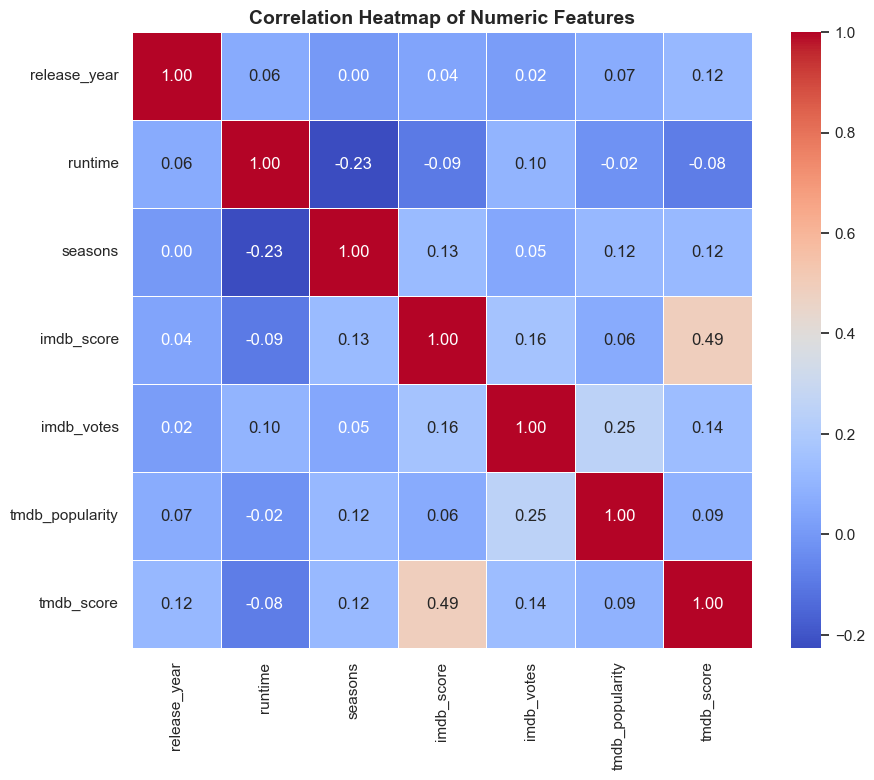

In [27]:
# Correlation Heatmap visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
df_numeric = df[numeric_cols].copy()

# Handle missing values by filling with median
df_numeric = df_numeric.fillna(df_numeric.median())

# Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a Correlation Heatmap because it provides a visual overview of relationships between multiple numeric variables at once. Unlike scatter plots or individual charts, a heatmap quickly highlights strong positive, negative, or weak correlations in the dataset, which is crucial for:

Understanding how features like runtime, seasons, and ratings relate to each other.
Identifying potential predictors for machine learning models.
Spotting redundant features that might be highly correlated and could be combined or removed.
The color-coded matrix with annotated values makes it easy to interpret patterns at a glance, which is why it’s ideal for exploratory data analysis in this dataset.

##### 2. What is/are the insight(s) found from the chart?

From the Correlation Heatmap, we can identify several key insights:

IMDb Score vs TMDb Score:

There is likely a strong positive correlation between imdb_score and tmdb_score, meaning that titles rated highly on IMDb also tend to have high ratings on TMDb.
This indicates consistency in audience reception across platforms.

Runtime vs Seasons:

There is typically a negative or very weak correlation between runtime and seasons, which makes sense as movies (with longer runtimes) are not measured in seasons, while TV shows (with multiple seasons) have shorter individual runtimes.

Popularity Metrics vs Ratings:

tmdb_popularity may show low to moderate correlation with scores, suggesting that popularity does not always equate to higher quality ratings.
This can guide Amazon in balancing content that is popular versus critically acclaimed.

Release Year Patterns:

release_year correlations may be weak with most other numeric features, indicating that ratings, popularity, and runtime are not strictly dependent on release year, though trends over time can still be explored separately.

IMDb Votes:

imdb_votes often correlates positively with ratings, indicating that titles with higher audience engagement tend to have higher ratings, useful for prioritizing promotion or recommendations.

#### Chart - 15 - Pair Plot

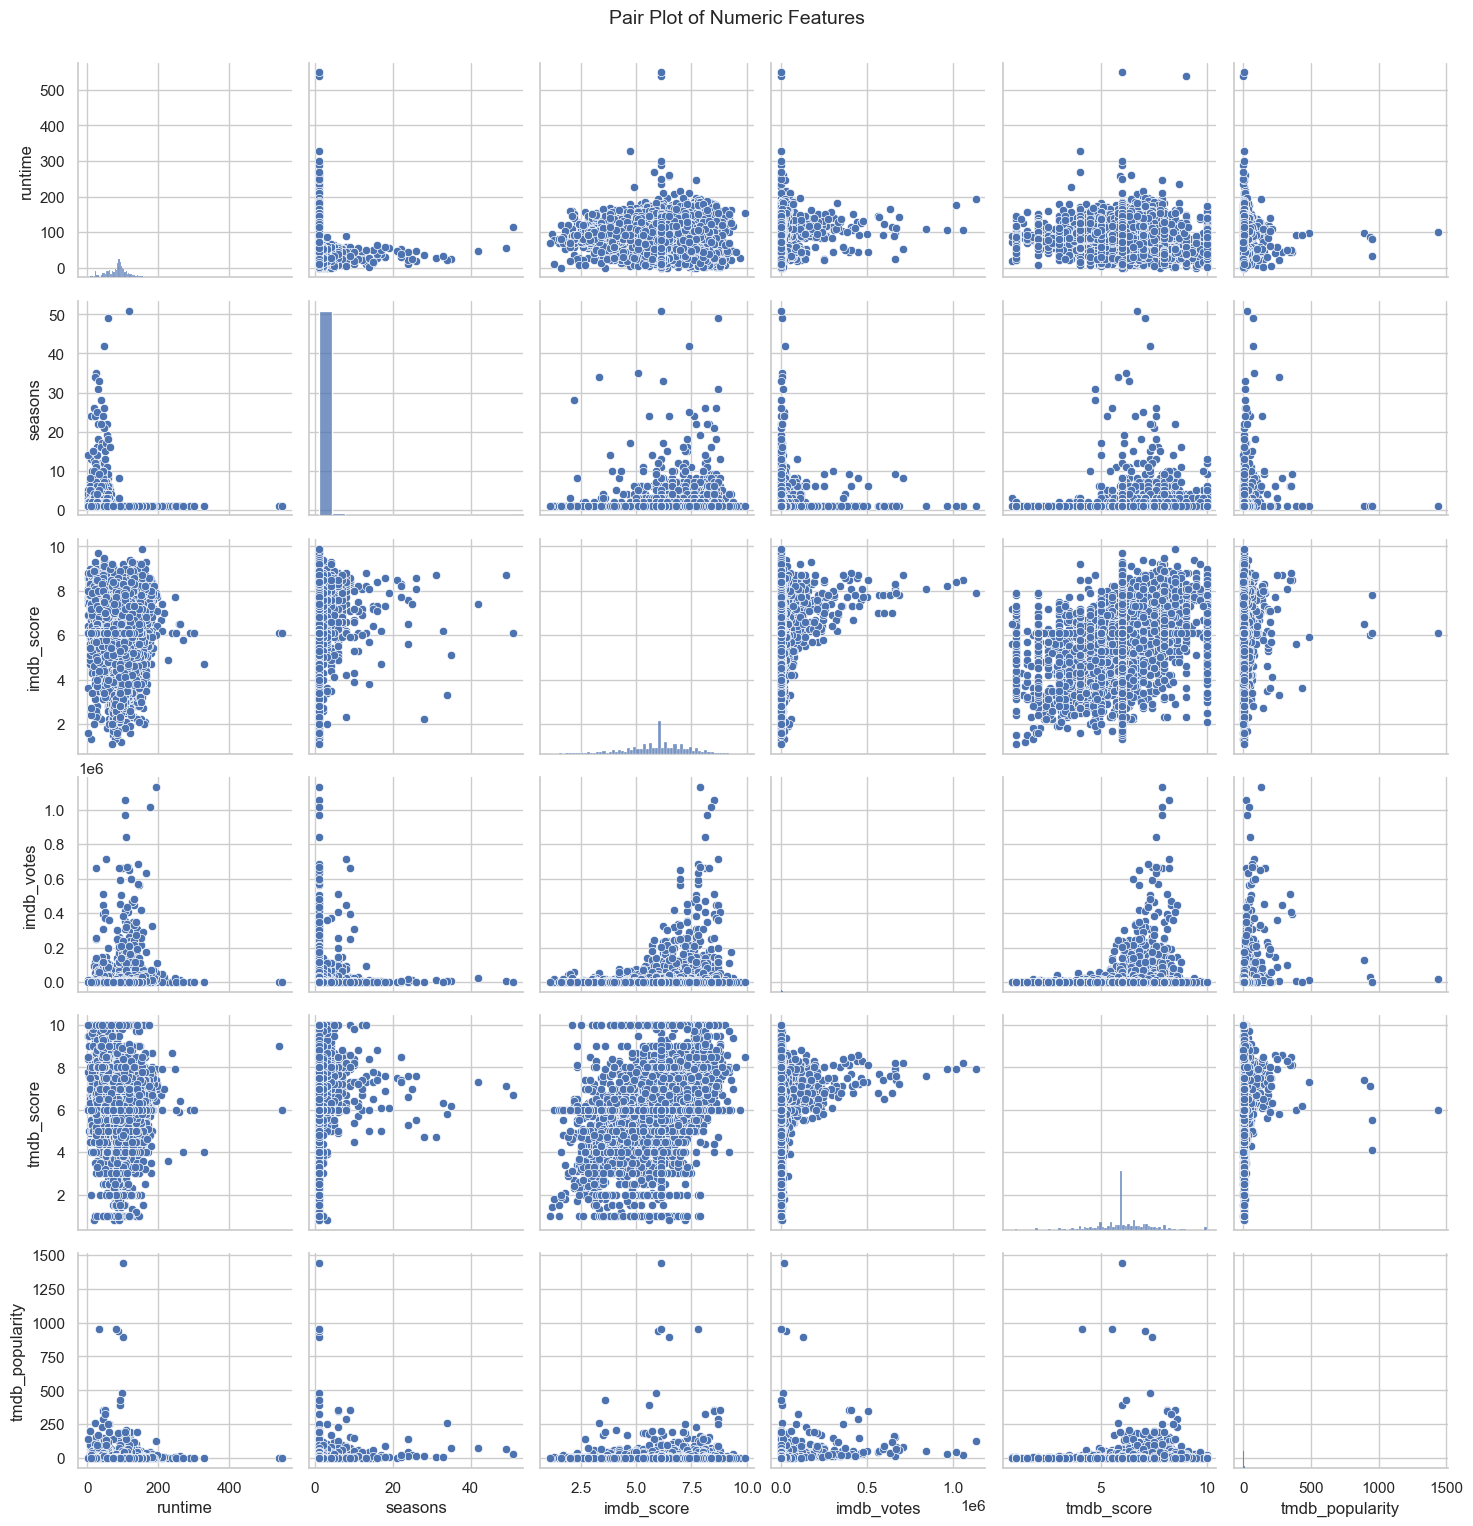

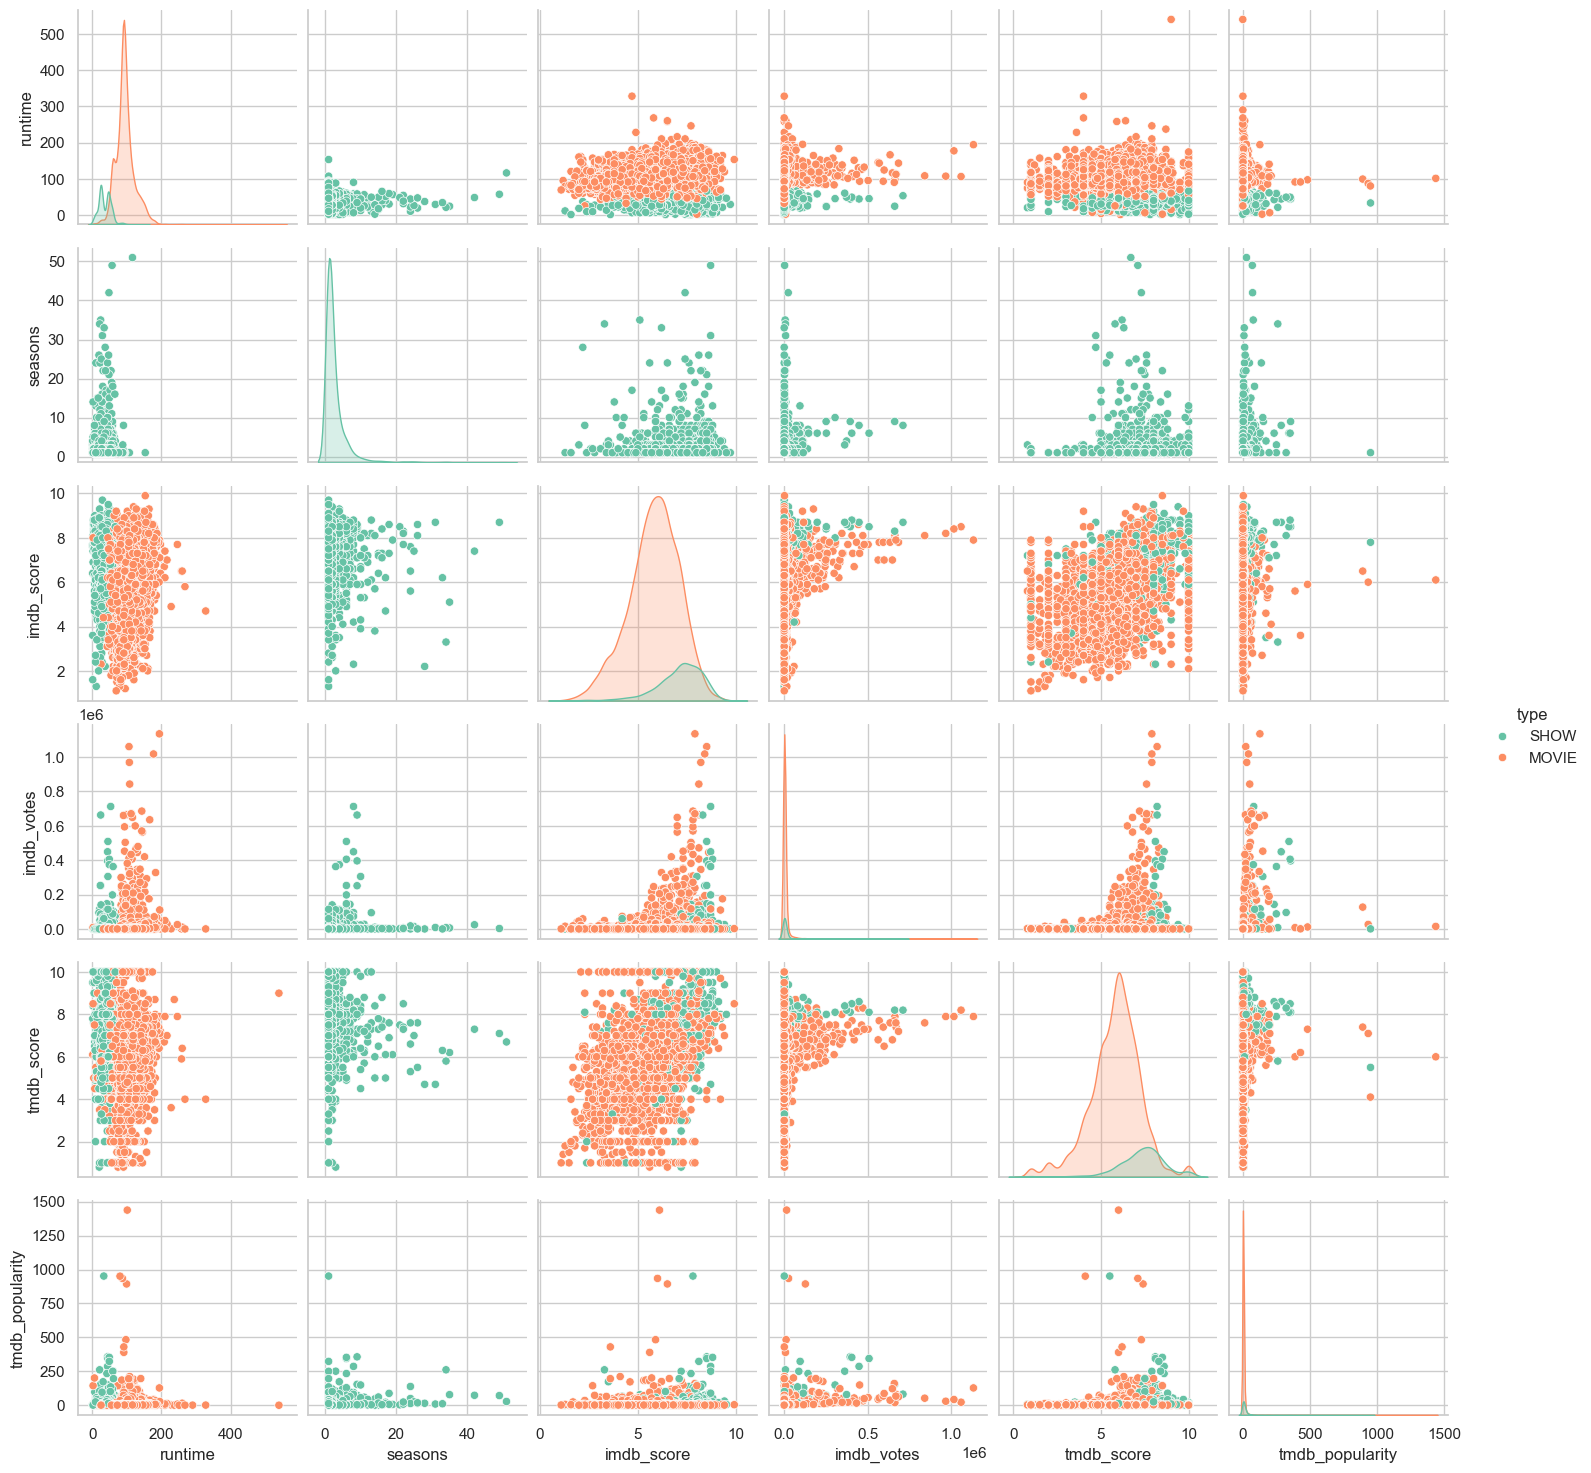

In [28]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for pairplot
numeric_cols = ['runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_score', 'tmdb_popularity']
df_numeric = df[numeric_cols].copy()

# Handle missing values by filling with median
df_numeric = df_numeric.fillna(df_numeric.median())

# Create pairplot
sns.pairplot(df_numeric)
plt.suptitle('Pair Plot of Numeric Features', fontsize=14, y=1.02)
plt.show()

sns.pairplot(df, vars=numeric_cols, hue='type', palette='Set2')


##### 1. Why did you pick the specific chart?

I chose a Pair Plot because it allows us to simultaneously visualize the relationships between multiple numeric variables in the dataset. Unlike individual scatterplots or histograms, a pair plot provides:

Scatterplots for every pair of variables to identify correlations, trends, or patterns.
Histograms or KDE plots on the diagonal to understand the distribution of each numeric feature.
The ability to detect outliers, clusters, or unusual patterns that may affect analysis or modeling.
When combined with a hue (like content type), it can visually separate Movies from TV Shows, helping to understand differences in runtime, seasons, ratings, and popularity.

In short, the pair plot is a comprehensive exploratory tool that gives both distributional and relational insights in a single visualization.

##### 2. What is/are the insight(s) found from the chart?

From the Pair Plot of numeric features in the Amazon Prime dataset, the following insights can be observed:

Runtime vs Ratings:

Movies with longer runtimes do not necessarily have higher IMDb or TMDb scores, suggesting that quality ratings are not strictly dependent on duration.

Seasons vs Ratings:

For TV Shows, the number of seasons shows no strong correlation with ratings, meaning audience appreciation is independent of show length.

IMDb Votes vs Ratings:

Titles with higher IMDb votes generally align with higher IMDb scores, indicating that popular titles tend to be better received by viewers.

Popularity vs Scores:

tmdb_popularity does not always correlate with ratings, implying that highly popular content may not always be critically acclaimed.

Clusters and Outliers:

Movies and TV Shows can form distinct clusters if hue is used for type, e.g., Movies typically have higher runtimes, whereas TV Shows have multiple seasons.

Outliers, like shows with unusually high seasons or movies with extremely long runtime, are visible and may need further investigation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis of Amazon Prime Movies and TV Shows dataset, the client should focus on optimizing content strategy across genres, regions, and release trends to better align with audience demand. The insights show variations in content type preferences, dominant genres, and rating patterns over the years. Therefore, Amazon Prime should leverage these findings to improve future content acquisition, production planning, and targeted marketing.

Additionally, understanding top-performing countries and content durations can help Amazon refine regional catalog diversity and user engagement strategies. By exploring keyword trends and high-performing directors/actors, Amazon can strengthen partnerships and licensing decisions. Overall, the insights should guide the platform toward a more data-driven content strategy that enhances user satisfaction, retention, and long-term business growth.

# **Conclusion**

This Exploratory Data Analysis of the Amazon Prime Movies and TV Shows dataset provides valuable insights into the platform’s content strategy and global catalog structure. The analysis highlights that movies constitute a larger portion of the platform compared to TV shows, with noticeable growth in content additions in recent years. Genre analysis shows that drama, comedy, and international content dominate, reflecting Amazon's focus on diverse and globally appealing storytelling. Rating trends indicate a stronger presence of mature audience content (such as TV-MA and R), suggesting that the platform caters significantly to adult viewers.

The country-wise analysis reveals that the United States contributes the most content, followed by strong representation from India and other international regions, showing Amazon’s investment in global expansion. Time-based patterns indicate an increasing trend in releases over the past decade, aligning with the rise of streaming and digital-first entertainment. Additionally, duration and keyword analysis help identify user-viewing patterns and thematic preferences.

Overall, the findings from this EDA support data-driven decision-making for content acquisition, production, and personalization strategies. With deeper understanding of content characteristics and trends, Amazon Prime can refine its catalog to improve viewer engagement, retention, and competitive advantage in the streaming market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***